In [4]:
%matplotlib inline

# import keras
# import keras.utils.np_utils
import keras_103 as keras
import matplotlib.pylab as pt
import math
import numpy as np
import pandas as pd

In [6]:
class MyHistory( keras.callbacks.Callback ):
    def __init__( self, m ):
        self.m = m
    def on_train_begin( self, logs={} ):
        self.weights = []
        self.bias = []
#         self.updates = []
        self.total_loss = []
    def on_epoch_end( self, epoch, logs={} ):
        ws = []
        bs = []
        for layer in self.m.layers:
            ws = np.append( ws, layer.get_weights()[ 0 ] )
            bs = np.append( bs, layer.get_weights()[ 1 ] )
        self.weights.append( ws )
        self.bias.append( bs )
#         self.updates.append( self.m.model.train_function.updated[ 2 ] )
        self.total_loss.append( self.m.model.train_function.updated[ 0 ] )

# Fitting cosine curve (0,2pi)

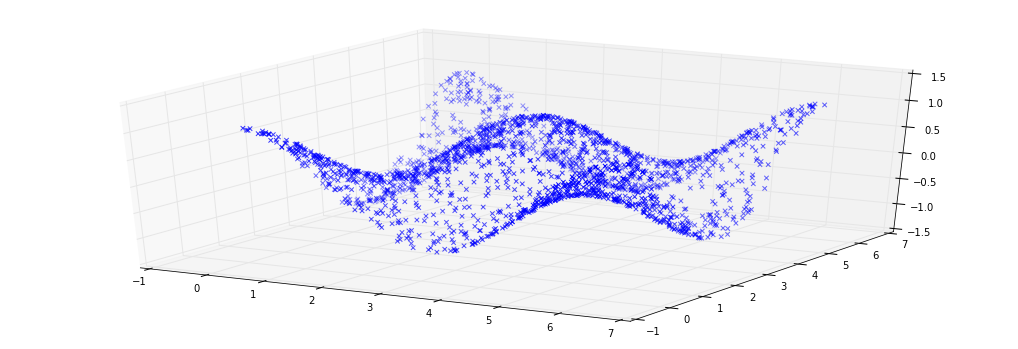

In [184]:
train_x1 = np.random.uniform( 0, 2 * math.pi, 2000 )
train_x2 = np.random.uniform( 0, 2 * math.pi, 2000 )
train_y = np.cos( train_x1 ) * np.cos( train_x2 )
nn_train_x1 = ( train_x1 - train_x1.mean() ) / train_x1.std() / train_x1.std()
nn_train_x2 = ( train_x2 - train_x2.mean() ) / train_x2.std() / train_x2.std()
nn_train_x = np.concatenate( [ nn_train_x1.reshape( -1, 1 ), nn_train_x2.reshape( -1, 1 ) ], axis=1 )
nn_train_y = ( train_y - train_y.min() ) / ( train_y.max() - train_y.min() )
# nn_train_y = ( train_y - train_y.min() ) / ( train_y.max() - train_y.min() ) * 2 - 1

from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure( figsize=( 18, 6 ) )
ax = fig.add_subplot( 111, projection='3d' )
ax.scatter( train_x1, train_x2, train_y, marker='x' )

In [191]:
m = keras.models.Sequential()
m.add( keras.layers.Dense( 16, input_dim=2, init='glorot_normal', activation='relu' ) )
m.add( keras.layers.Dense( 1, init='glorot_normal', activation='relu' ) )
m.compile( loss='mse', optimizer='adam' )
myhistory1 = MyHistory( m )
history1 = m.fit( nn_train_x, nn_train_y, batch_size=100, nb_epoch=200, validation_split=.0, shuffle=False, verbose=0, callbacks=[ myhistory1 ] )
print 'loss: %r' % m.evaluate( nn_train_x, nn_train_y )
p = m.predict( nn_train_x ).reshape( -1 )
pd.DataFrame( [ nn_train_y, p ] ).T.head()

2000/2000 [==============================] - 0s     
loss: 0.0075840276926755906


,0,1
0,0.224001,0.245504
1,0.203785,0.229810
2,0.918701,0.755874
3,0.897707,0.676839
4,0.854520,0.686494


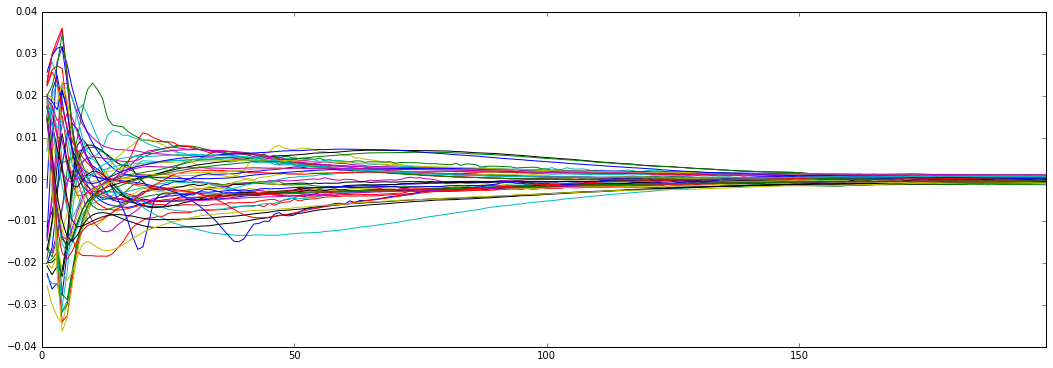

In [192]:
pd.DataFrame( myhistory1.weights ).diff().plot.line( legend=False, figsize=( 18, 6 ) )

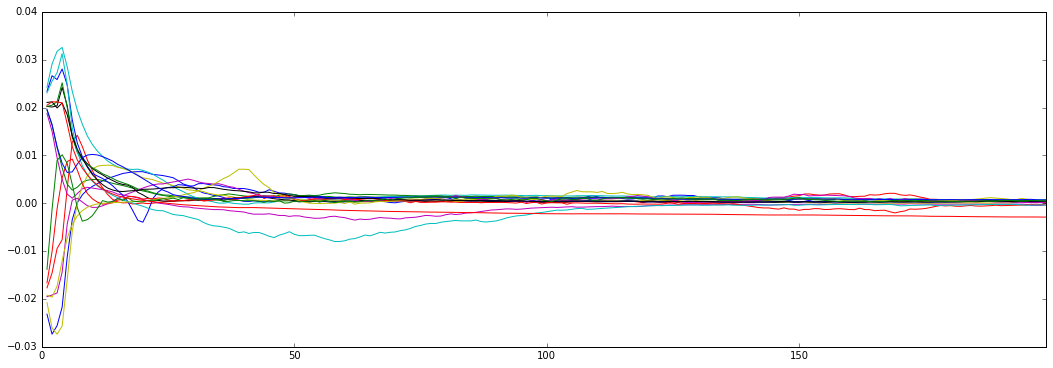

In [193]:
pd.DataFrame( myhistory1.bias ).diff().plot.line( legend=False, figsize=( 18, 6 ) )

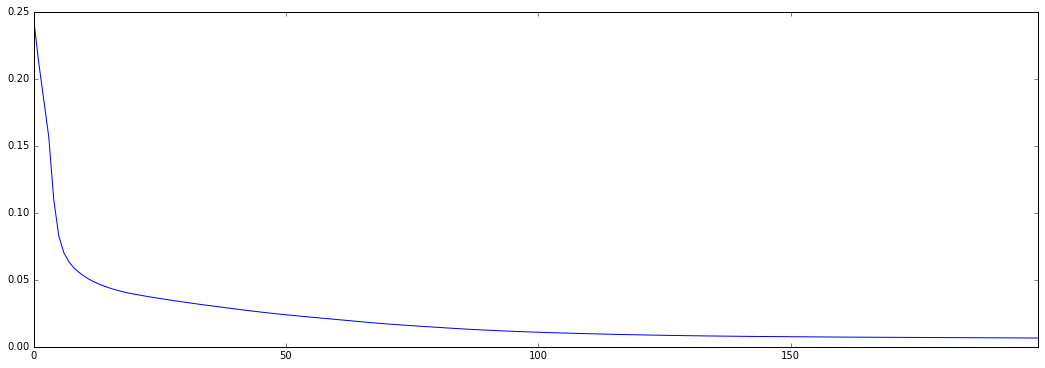

In [194]:
pd.DataFrame( myhistory1.total_loss ).plot.line( legend=False, figsize=( 18, 6 ) )

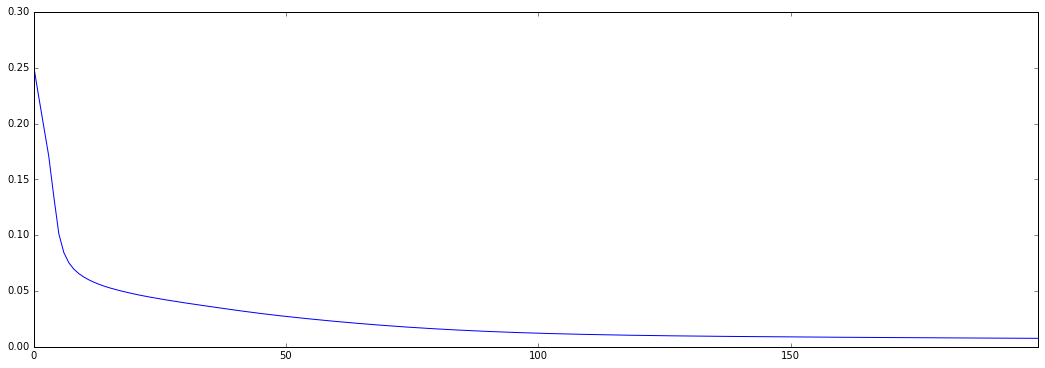

In [195]:
pd.DataFrame( history1.history[ 'loss' ] ).plot.line( legend=False, figsize=( 18, 6 ) )

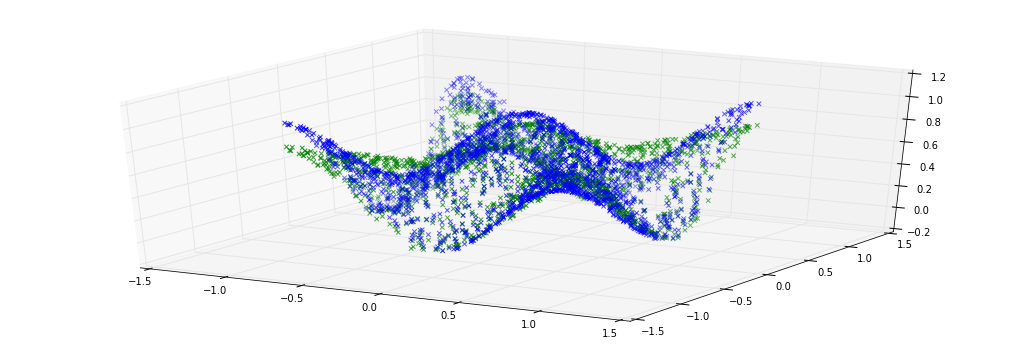

In [196]:
fig = pt.figure( figsize=( 18, 6 ) )
ax = fig.add_subplot( 111, projection='3d' )
ax.scatter( nn_train_x1, nn_train_x2, nn_train_y, c='b', marker='x' )
ax.scatter( nn_train_x1, nn_train_x2, p, c='g', marker='x' )

# Fitting cosine curve (0,4pi)

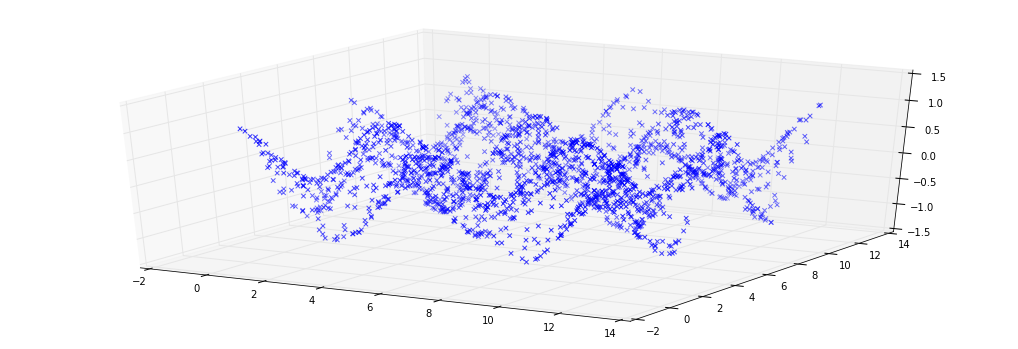

In [134]:
train_x1 = np.random.uniform( 0, 4 * math.pi, 2000 )
train_x2 = np.random.uniform( 0, 4 * math.pi, 2000 )
train_y = np.cos( train_x1 ) * np.cos( train_x2 )
nn_train_x1 = ( train_x1 - train_x1.mean() ) / train_x1.std() / train_x1.std()
nn_train_x2 = ( train_x2 - train_x2.mean() ) / train_x2.std() / train_x2.std()
nn_train_x = np.concatenate( [ nn_train_x1.reshape( -1, 1 ), nn_train_x2.reshape( -1, 1 ) ], axis=1 )
nn_train_y = ( train_y - train_y.min() ) / ( train_y.max() - train_y.min() )

from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure( figsize=( 18, 6 ) )
ax = fig.add_subplot( 111, projection='3d' )
ax.scatter( train_x1, train_x2, train_y, marker='x' )

In [153]:
m = keras.models.Sequential()
m.add( keras.layers.Dense( 128, input_dim=2, init='glorot_normal', activation='relu' ) )
m.add( keras.layers.Dense( 1, init='glorot_normal', activation='relu' ) )
m.compile( loss='mse', optimizer='adam' )
myhistory2 = MyHistory( m )
history2 = m.fit( nn_train_x, nn_train_y, batch_size=100, nb_epoch=1000, validation_split=.0, shuffle=False, verbose=0, callbacks=[ myhistory2 ] )
print 'loss: %r' % m.evaluate( nn_train_x, nn_train_y )
p = m.predict( nn_train_x )
pd.DataFrame( [ nn_train_y, p ] ).T.head()

2000/2000 [==============================] - 0s     
loss: 0.00014769623056054115


,0,1
0,0.581869,[0.592710375786]
1,0.677455,[0.674927830696]
2,0.543812,[0.538632750511]
3,0.358962,[0.338028043509]
4,0.0922913,[0.0892311036587]


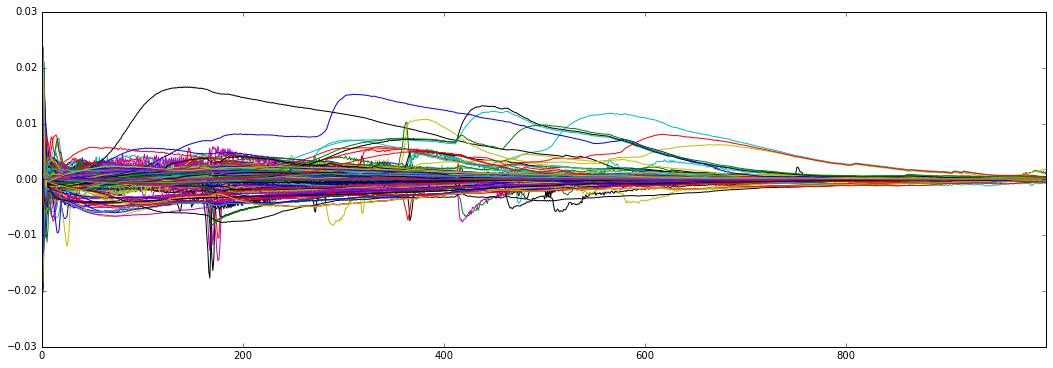

In [154]:
pd.DataFrame( myhistory2.weights ).diff().plot.line( legend=False, figsize=( 18, 6 ) )

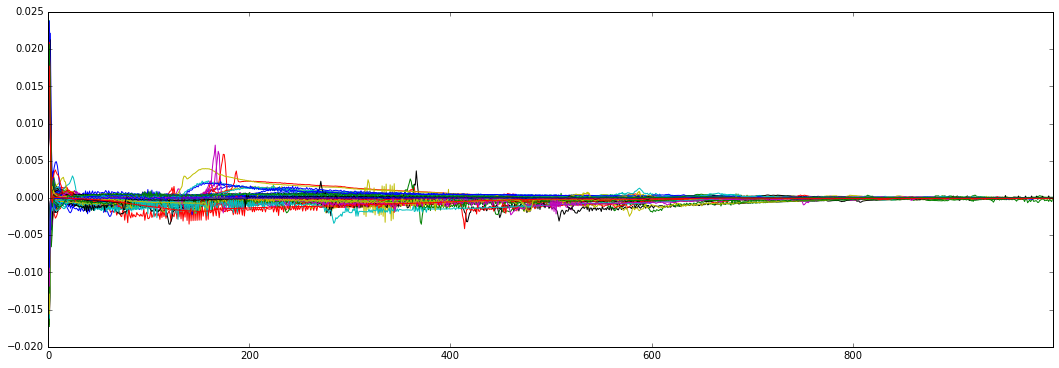

In [155]:
pd.DataFrame( myhistory2.bias ).diff().plot.line( legend=False, figsize=( 18, 6 ) )

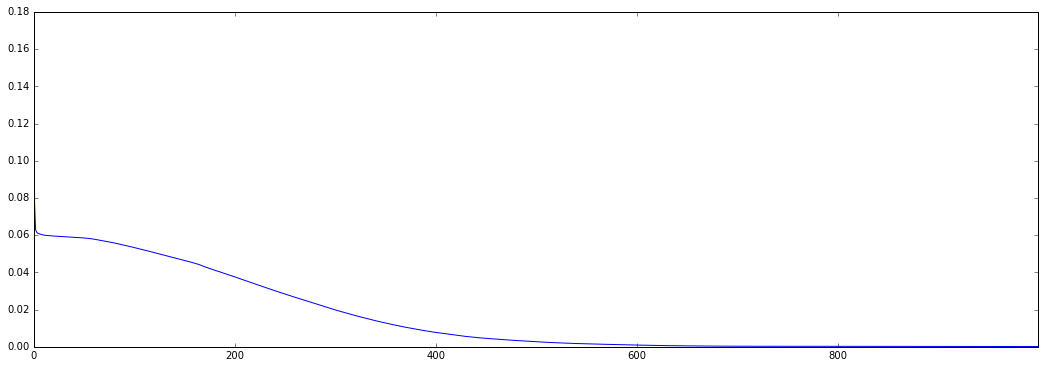

In [156]:
pd.DataFrame( myhistory2.total_loss ).plot.line( legend=False, figsize=( 18, 6 ) )

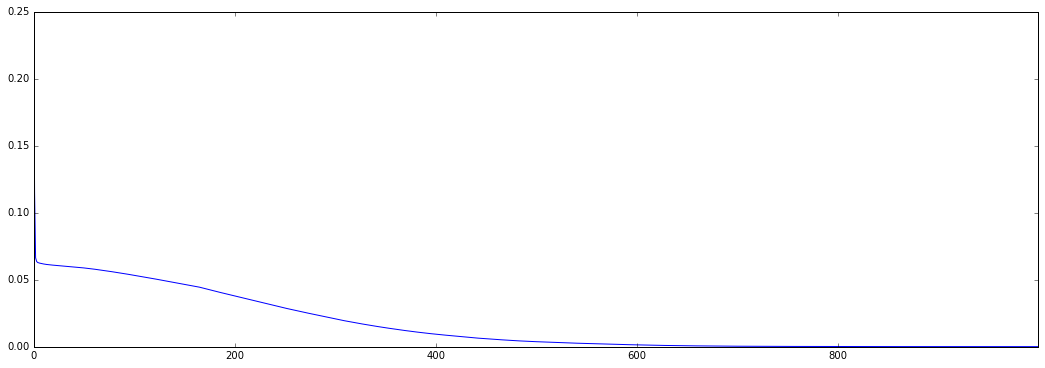

In [157]:
pd.DataFrame( history2.history[ 'loss' ] ).plot.line( legend=False, figsize=( 18, 6 ) )

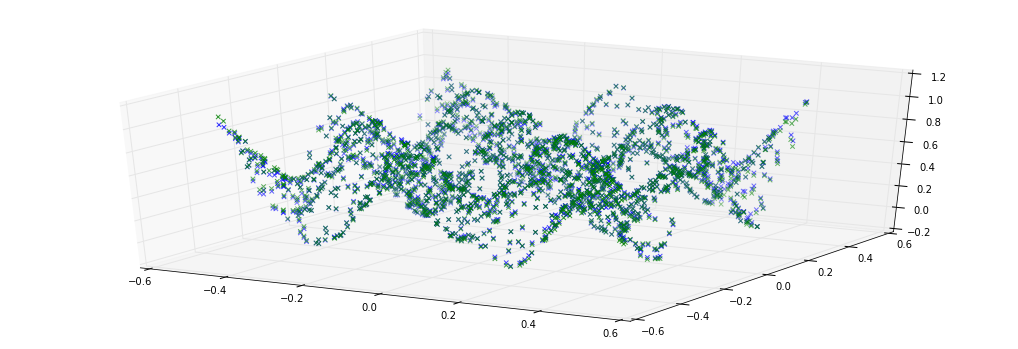

In [158]:
fig = pt.figure( figsize=( 18, 6 ) )
ax = fig.add_subplot( 111, projection='3d' )
ax.scatter( nn_train_x1, nn_train_x2, nn_train_y, c='b', marker='x' )
ax.scatter( nn_train_x1, nn_train_x2, p, c='g', marker='x' )

# Fitting exponential curve

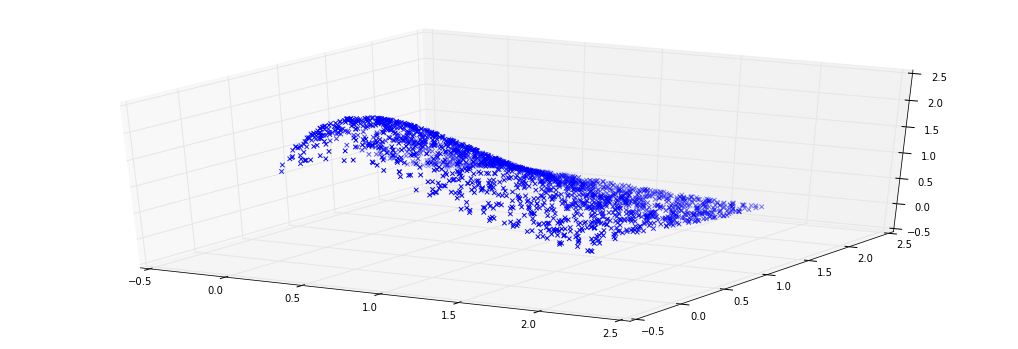

In [133]:
train_x1 = np.random.uniform( 0, 2, 2000 )
train_x2 = np.random.uniform( 0, 2, 2000 )
train_y = np.exp( -train_x1 * np.log( train_x1 ) ) * np.exp( -train_x2 * np.log( train_x2 ) )
nn_train_x1 = ( train_x1 - train_x1.mean() ) / train_x1.std() / train_x1.std()
nn_train_x2 = ( train_x2 - train_x2.mean() ) / train_x2.std() / train_x2.std()
nn_train_x = np.concatenate( [ train_x1.reshape( -1, 1 ), train_x2.reshape( -1, 1 ) ], axis=1 )
nn_train_y = ( train_y - train_y.min() ) / ( train_y.max() - train_y.min() )

from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure( figsize=( 18, 6 ) )
ax = fig.add_subplot( 111, projection='3d' )
ax.scatter( train_x1, train_x2, train_y, marker='x' )

In [124]:
m = keras.models.Sequential()
m.add( keras.layers.Dense( 16, input_dim=2, init='glorot_normal', activation='relu' ) )
m.add( keras.layers.Dense( 1, init='glorot_normal', activation='relu' ) )
m.compile( loss='mse', optimizer='adam' )

myhistory3 = MyHistory( m )
history3 = m.fit( nn_train_x, nn_train_y, batch_size=100, nb_epoch=100, validation_split=.0, shuffle=False, verbose=0, callbacks=[ myhistory3 ] )
print 'loss: %r' % m.evaluate( nn_train_x, nn_train_y )
p = m.predict( nn_train_x )
pd.DataFrame( [ nn_train_y, p ] ).T.head()

2000/2000 [==============================] - 0s     
loss: 0.0016688865711912513


,0,1
0,0.768555,[0.712822556496]
1,0.809714,[0.767996907234]
2,0.65128,[0.635870754719]
3,0.186368,[0.195935294032]
4,0.156489,[0.169094249606]


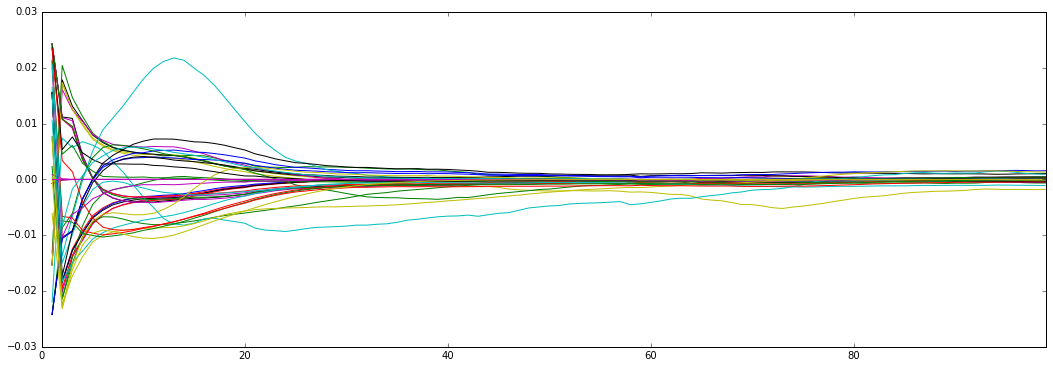

In [125]:
pd.DataFrame( myhistory3.weights ).diff().plot.line( legend=False, figsize=( 18, 6 ) )

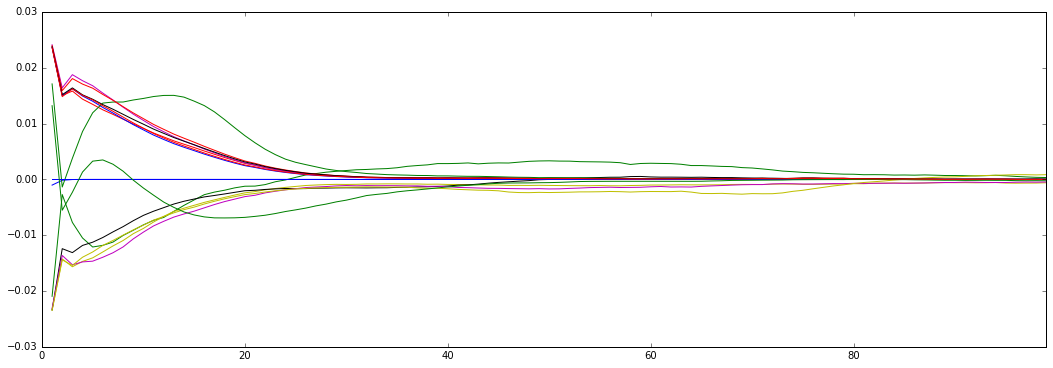

In [126]:
pd.DataFrame( myhistory3.bias ).diff().plot.line( legend=False, figsize=( 18, 6 ) )

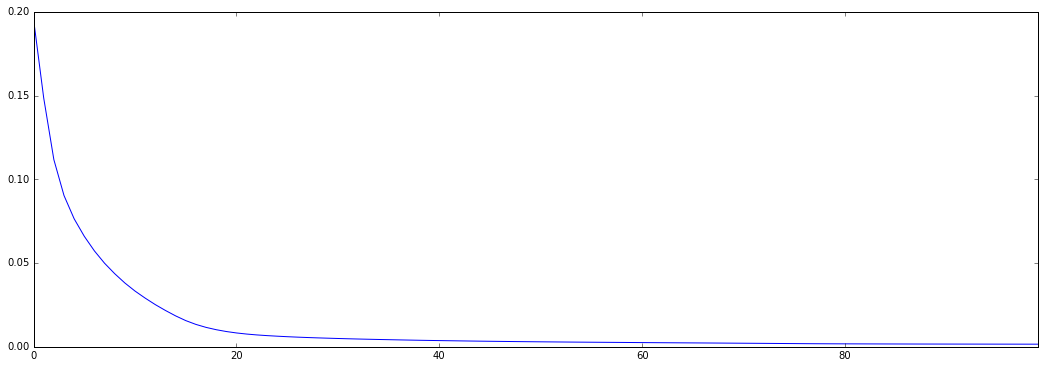

In [127]:
pd.DataFrame( myhistory3.total_loss ).plot.line( legend=False, figsize=( 18, 6 ) )

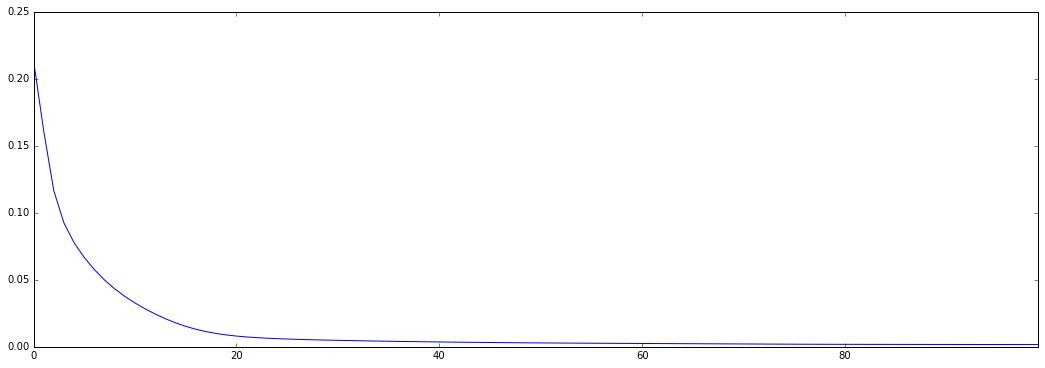

In [128]:
pd.DataFrame( history3.history[ 'loss' ] ).plot.line( legend=False, figsize=( 18, 6 ) )

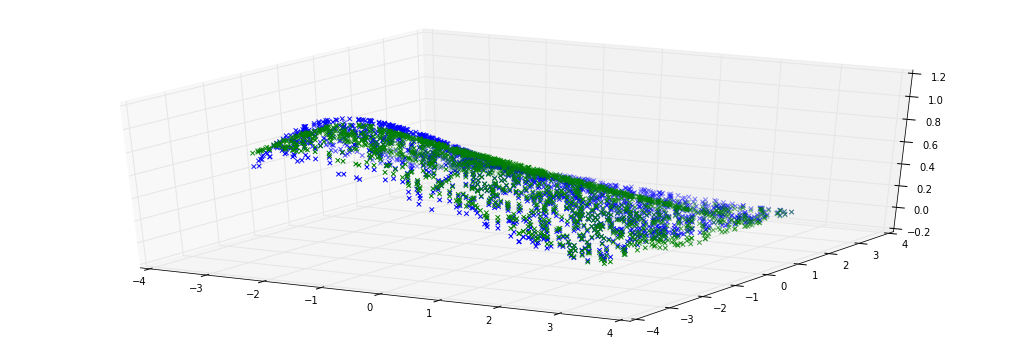

In [132]:
fig = pt.figure( figsize=( 18, 6 ) )
ax = fig.add_subplot( 111, projection='3d' )
ax.scatter( nn_train_x1, nn_train_x2, nn_train_y, c='b', marker='x' )
ax.scatter( nn_train_x1, nn_train_x2, p, c='g', marker='x' )

# Fitting cosine curve (0,2pi) without standardizing inputs

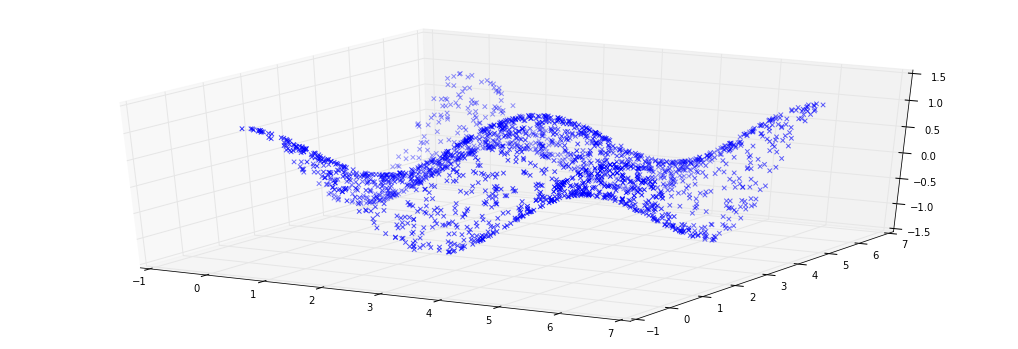

In [197]:
train_x1 = np.random.uniform( 0, 2 * math.pi, 2000 )
train_x2 = np.random.uniform( 0, 2 * math.pi, 2000 )
train_y = np.cos( train_x1 ) * np.cos( train_x2 )
# nn_train_x1 = ( train_x1 - train_x1.mean() ) / train_x1.std() / train_x1.std()
# nn_train_x2 = ( train_x2 - train_x2.mean() ) / train_x2.std() / train_x2.std()
nn_train_x1 = ( train_x1 - train_x1.min() ) / ( train_x1.max() - train_x1.min() )
nn_train_x2 = ( train_x2 - train_x2.min() ) / ( train_x2.max() - train_x2.min() )
nn_train_x = np.concatenate( [ nn_train_x1.reshape( -1, 1 ), nn_train_x2.reshape( -1, 1 ) ], axis=1 )
nn_train_y = ( train_y - train_y.min() ) / ( train_y.max() - train_y.min() )

from mpl_toolkits.mplot3d import Axes3D
fig = pt.figure( figsize=( 18, 6 ) )
ax = fig.add_subplot( 111, projection='3d' )
ax.scatter( train_x1, train_x2, train_y, marker='x' )

In [204]:
m = keras.models.Sequential()
m.add( keras.layers.Dense( 16, input_dim=2, init='glorot_normal', activation='relu' ) )
m.add( keras.layers.Dense( 1, init='glorot_normal', activation='relu' ) )
m.compile( loss='mse', optimizer='adam' )
myhistory1 = MyHistory( m )
history1 = m.fit( nn_train_x, nn_train_y, batch_size=100, nb_epoch=200, validation_split=.0, shuffle=False, verbose=0, callbacks=[ myhistory1 ] )
print 'loss: %r' % m.evaluate( nn_train_x, nn_train_y )
p = m.predict( nn_train_x ).reshape( -1 )
pd.DataFrame( [ nn_train_y, p ] ).T.head()

2000/2000 [==============================] - 0s     
loss: 0.057519785970449447


,0,1
0,0.729361,0.500431
1,0.723743,0.486742
2,0.228628,0.492488
3,0.181478,0.494332
4,0.507770,0.508572


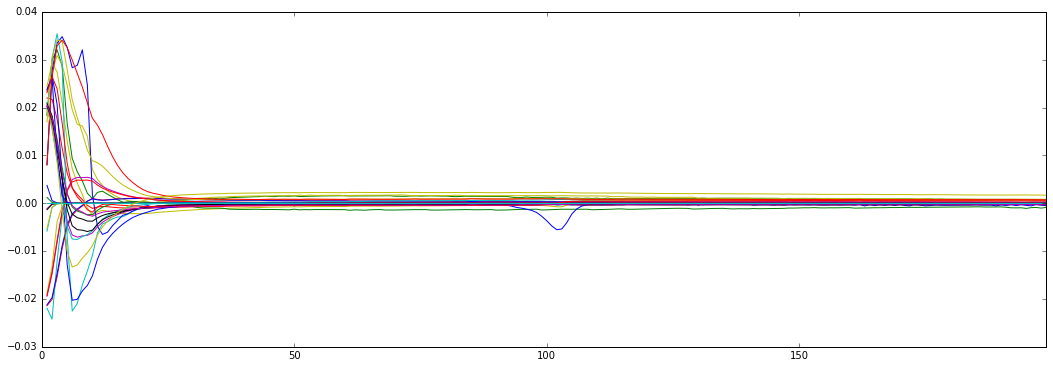

In [205]:
pd.DataFrame( myhistory1.weights ).diff().plot.line( legend=False, figsize=( 18, 6 ) )

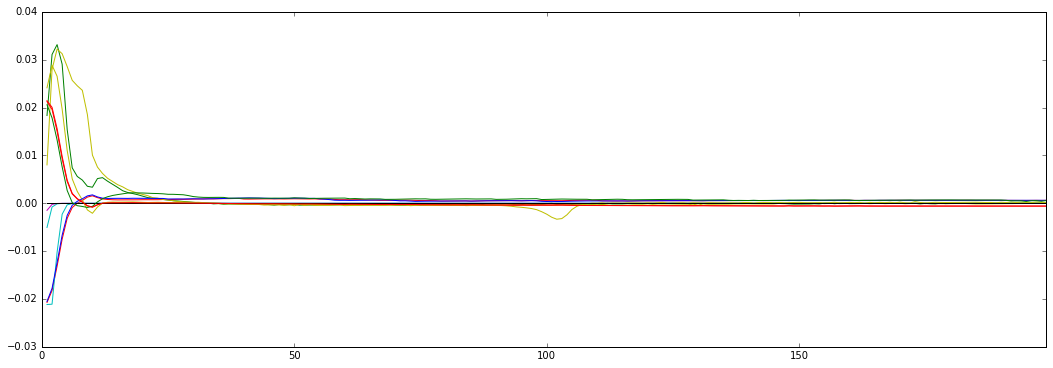

In [206]:
pd.DataFrame( myhistory1.bias ).diff().plot.line( legend=False, figsize=( 18, 6 ) )

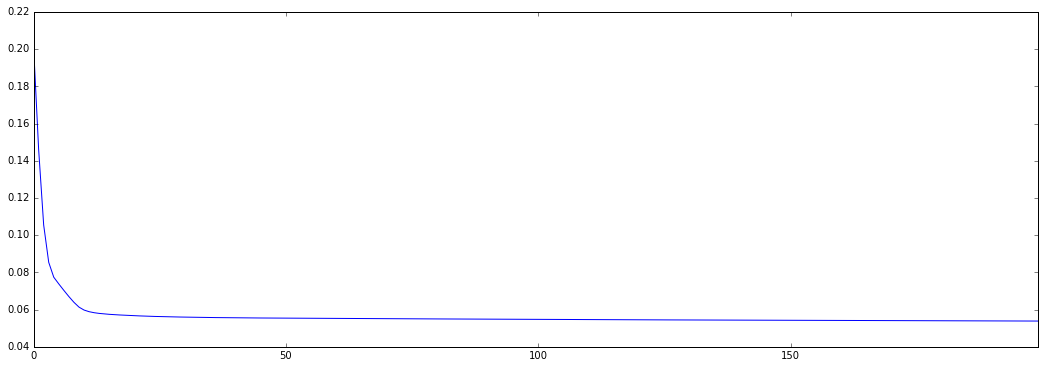

In [207]:
pd.DataFrame( myhistory1.total_loss ).plot.line( legend=False, figsize=( 18, 6 ) )

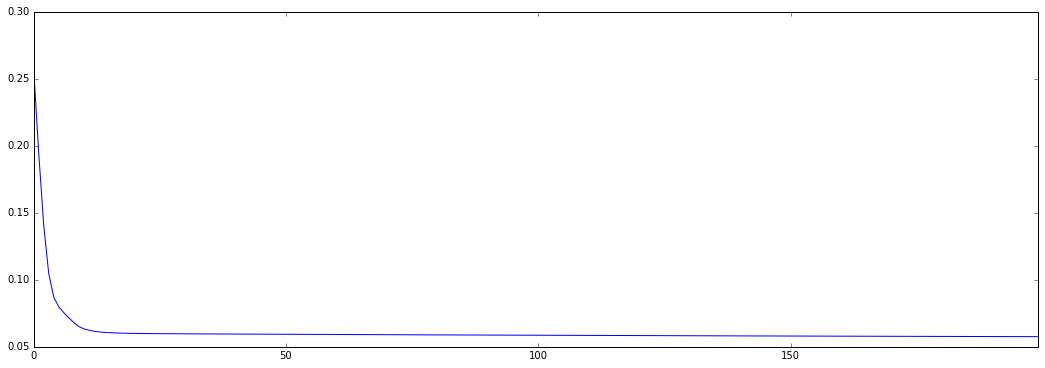

In [208]:
pd.DataFrame( history1.history[ 'loss' ] ).plot.line( legend=False, figsize=( 18, 6 ) )

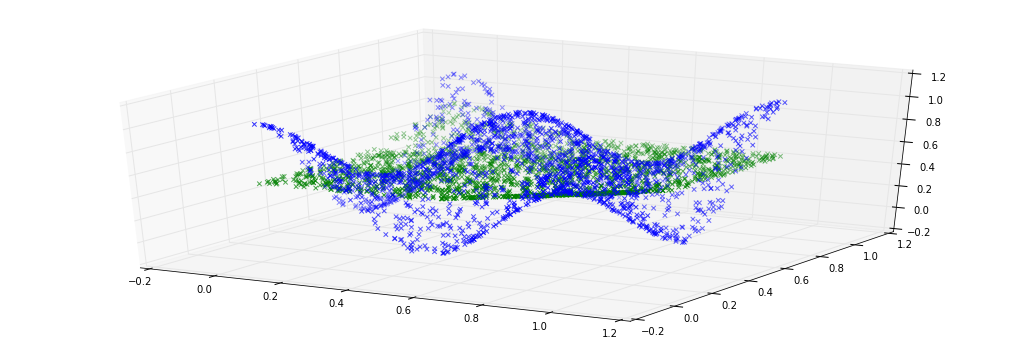

In [209]:
fig = pt.figure( figsize=( 18, 6 ) )
ax = fig.add_subplot( 111, projection='3d' )
ax.scatter( nn_train_x1, nn_train_x2, nn_train_y, c='b', marker='x' )
ax.scatter( nn_train_x1, nn_train_x2, p, c='g', marker='x' )